In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
df=pd.read_csv('leads.csv')

In [86]:
df.shape

(9240, 37)

In [87]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [88]:
null_values=pd.DataFrame((df.isnull().sum()/len(df))*100)
null_values.reset_index()

,index,0
0,Prospect ID,0.000000
1,Lead Number,0.000000
2,Lead Origin,0.000000
3,Lead Source,0.389610
4,Do Not Email,0.000000
5,Do Not Call,0.000000
6,Converted,0.000000
7,TotalVisits,1.482684
8,Total Time Spent on Website,0.000000
9,Page Views Per Visit,1.482684


In [89]:
filtered_null=(null_values[null_values[0]>10])
filtered_null.reset_index(inplace=True)

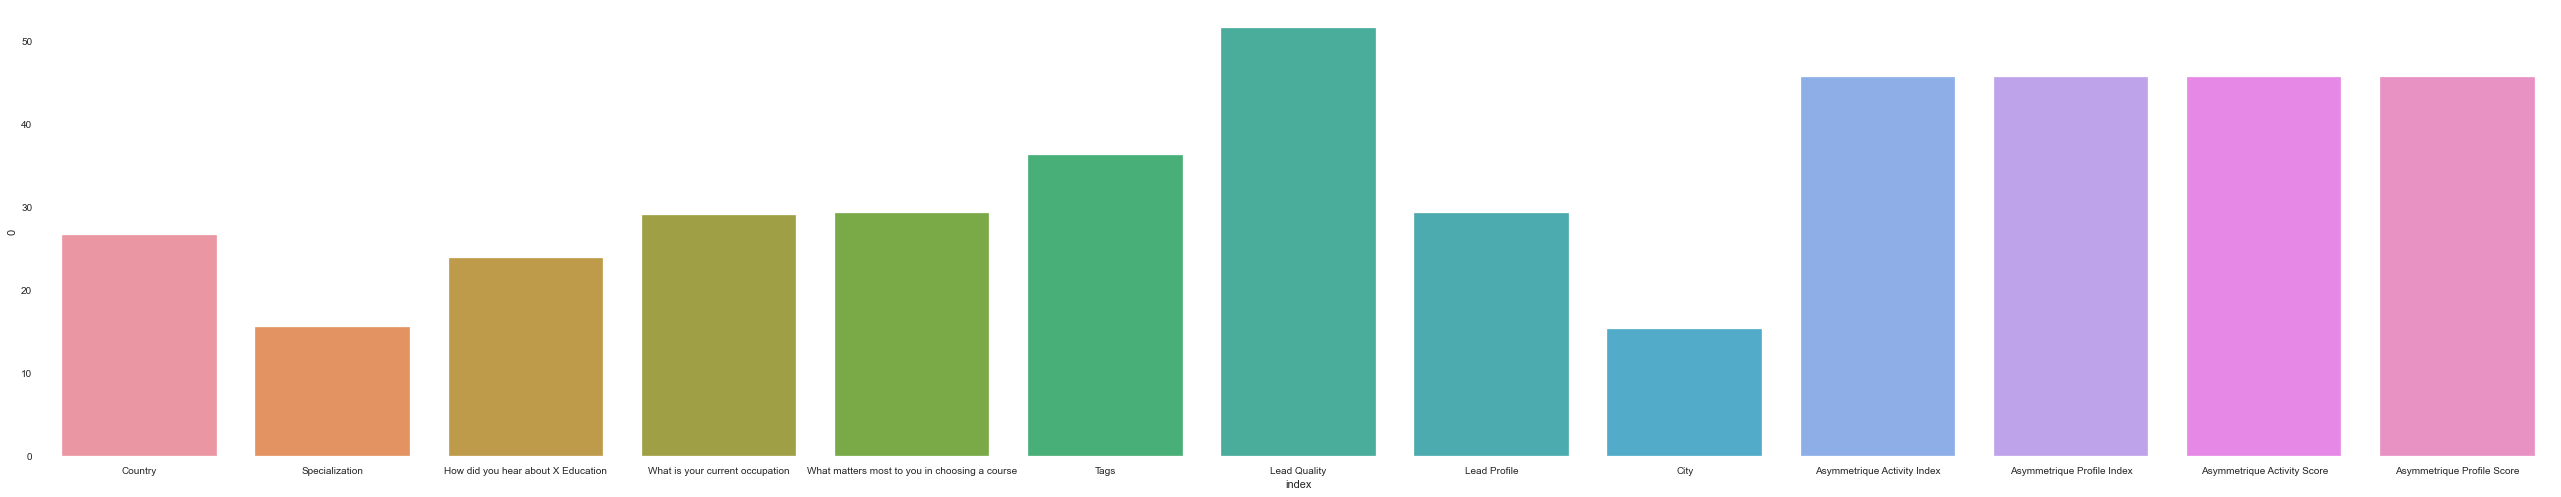

In [362]:
fig, ax = plt.subplots()
fig.set_size_inches(45, 8.27)
sns.barplot(filtered_null['index'],filtered_null[0])
plt.savefig('foo.png')

In [91]:
df.drop(columns=['Prospect ID','Lead Number','Last Activity'],axis=1,inplace=True)

In [92]:
can_be_dropped_feat=[]
for i in df.columns:
    if((df[i].isnull().sum()/len(df))>0.20):
        can_be_dropped_feat.append(i)

In [93]:
print('Dimensions of new data matrix {}'.format(df.shape))
print('No. of features dropped {}'.format(len(can_be_dropped_feat)))

Dimensions of new data matrix (9240, 34)
No. of features dropped 11


In [94]:
can_be_dropped_feat

['Country',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

there are 11 such features which before imputation need to be looked into!

In [95]:
print(df['Country'].unique())
print('No.of unique countries {}'.format(df['Country'].nunique()))

[nan 'India' 'Russia' 'Kuwait' 'Oman' 'United Arab Emirates'
 'United States' 'Australia' 'United Kingdom' 'Bahrain' 'Ghana'
 'Singapore' 'Qatar' 'Saudi Arabia' 'Belgium' 'France' 'Sri Lanka' 'China'
 'Canada' 'Netherlands' 'Sweden' 'Nigeria' 'Hong Kong' 'Germany'
 'Asia/Pacific Region' 'Uganda' 'Kenya' 'Italy' 'South Africa' 'Tanzania'
 'unknown' 'Malaysia' 'Liberia' 'Switzerland' 'Denmark' 'Philippines'
 'Bangladesh' 'Vietnam' 'Indonesia']
No.of unique countries 38


In [96]:
df['Country'].isnull().sum()

2461

In [97]:
# set Nan Values to Unknown in dataframe
df['Country'].fillna('Unknown',inplace=True)

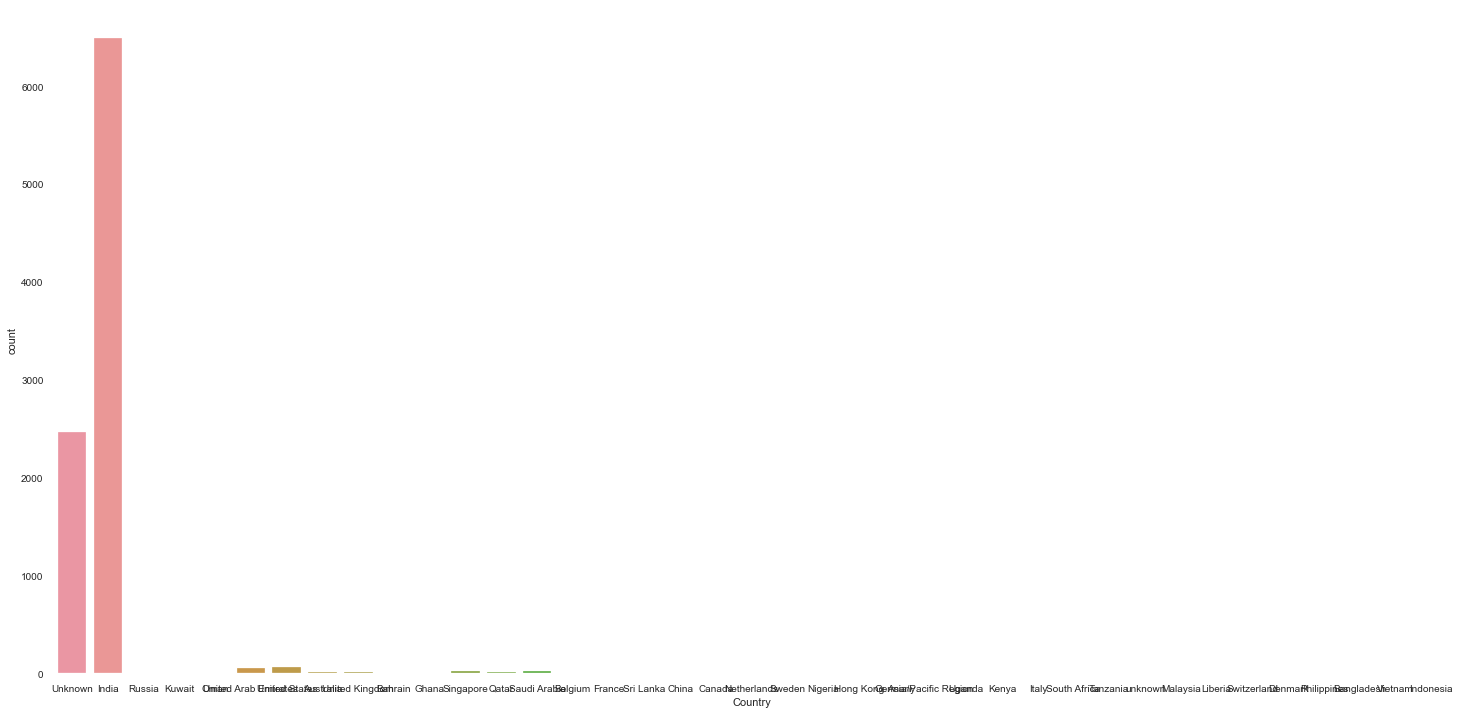

In [98]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 12.27)
sns.countplot(df['Country'])

The majority of visitors belong to India followed by those where system failed to locate their country!

In [99]:
df['Country_name']=np.where(df['Country']!='India','Other','India')

<b>if not India all other are classified as Other because we assume the company is an Indian ed-tech firm and mean to serve the Indian community at pref

In [100]:
df.drop(columns=['Country'],axis=1,inplace=True)

<b>'How did you hear about X Education' null values treatment and analysis</b>

In [101]:
print(df['How did you hear about X Education'].unique())
print('length of How did you hear about X Education {}'.format(len(df['How did you hear about X Education'].unique())))

['Select' 'Word Of Mouth' 'Other' nan 'Online Search' 'Multiple Sources'
 'Advertisements' 'Student of SomeSchool' 'Email' 'Social Media' 'SMS']
length of How did you hear about X Education 11


In [102]:
df['How did you hear about X Education'].isnull().sum()

2207

In [103]:
df['How did you hear about X Education'].fillna('Unknown',inplace=True)

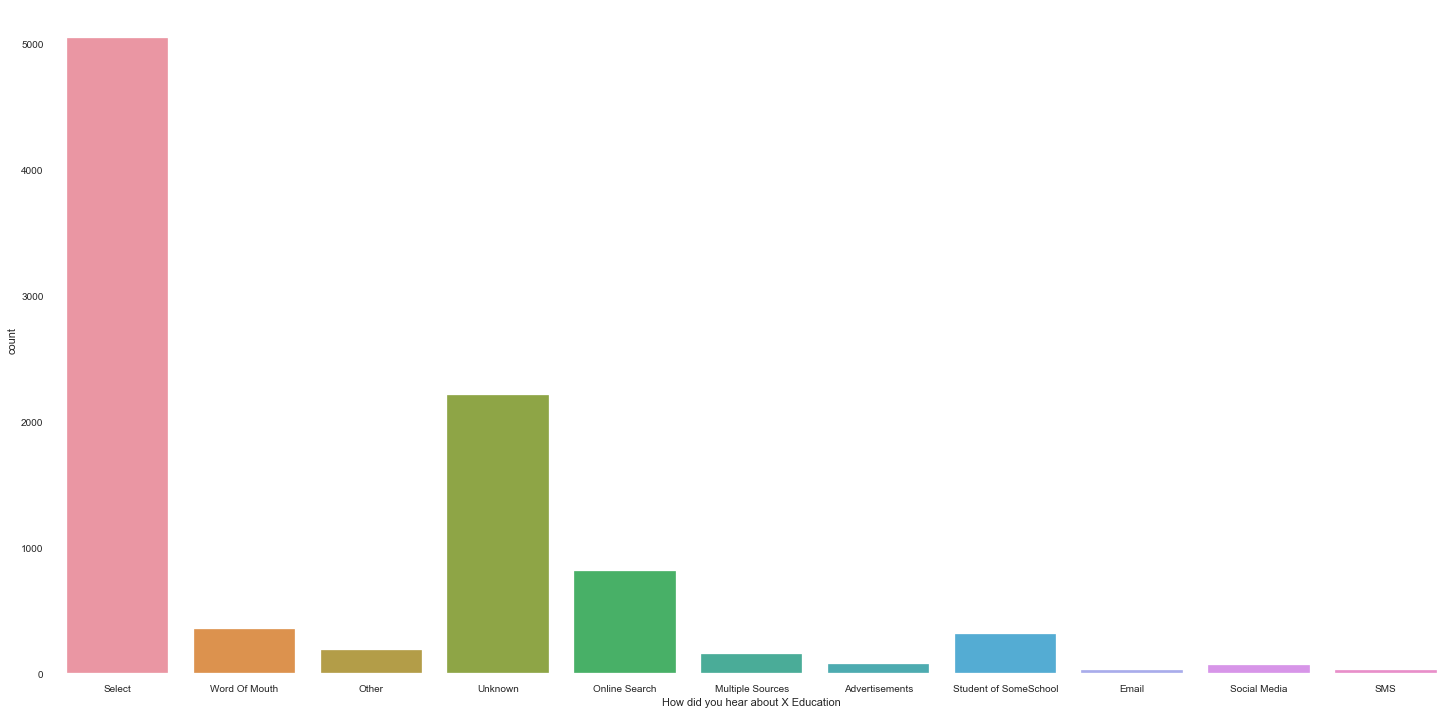

In [104]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 12.27)
sns.countplot(df['How did you hear about X Education'])

In [105]:
## drop the deature because most of the values are not selected also bceause this feature doesn't matter
df.drop(columns=['How did you hear about X Education'],axis=1,inplace=True)

In [106]:
## datamatrix shape
df.shape

(9240, 33)

<b>'What is your current occupation' feature analysis

In [107]:
df['What is your current occupation'].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [108]:
df['What is your current occupation'].isnull().sum()

2690

In [109]:
df['What is your current occupation'].fillna('Unknown',inplace=True)

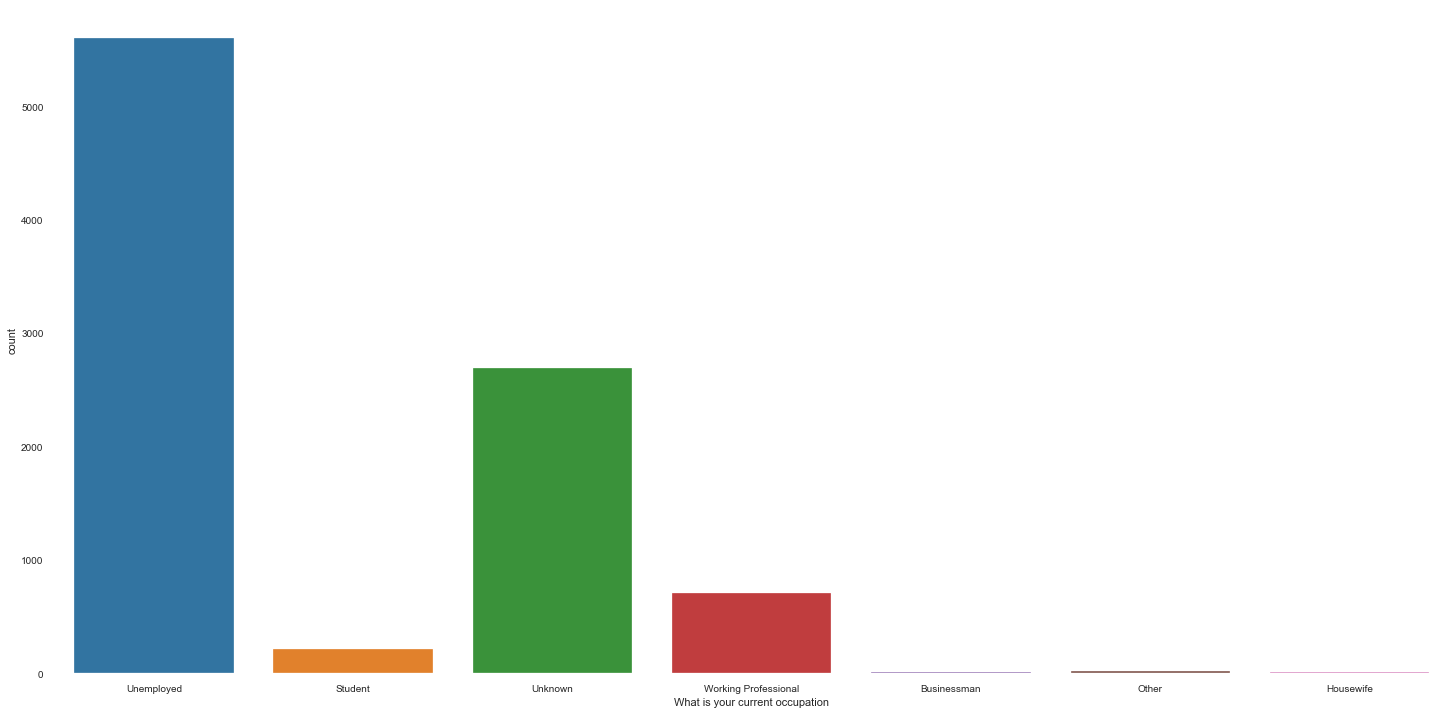

In [110]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 12.27)
sns.countplot(df['What is your current occupation'])

<b>'What matters most to you in choosing a course' feature analysis

In [111]:
df['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [112]:
df['What matters most to you in choosing a course'].isnull().sum()

2709

In [113]:
df['What matters most to you in choosing a course'].fillna('Unknown',inplace=True)

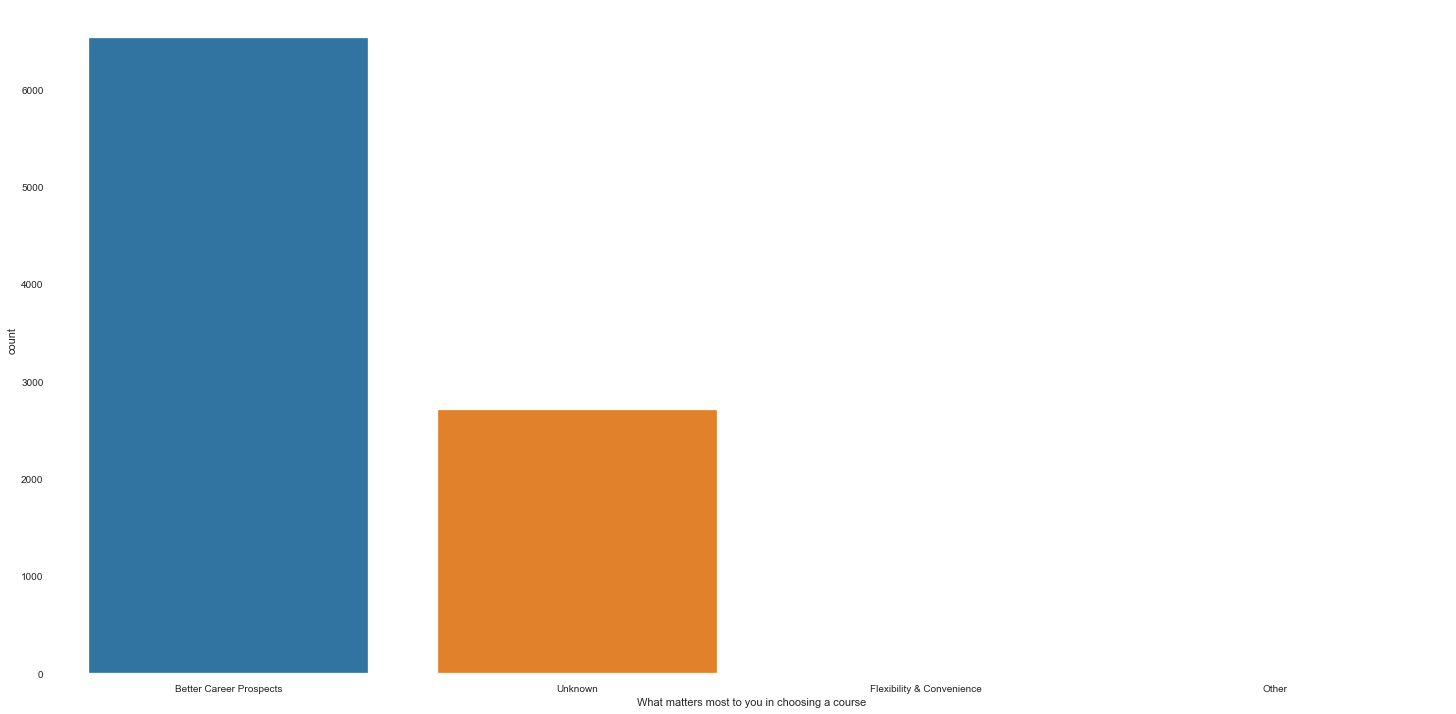

In [114]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 12.27)
sns.countplot(df['What matters most to you in choosing a course'])

<b> 'Tags' feature analysis

In [115]:
df['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [116]:
df['Tags'].fillna('Unknown',inplace=True)

In [117]:
df['Tags'].value_counts()

Unknown                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


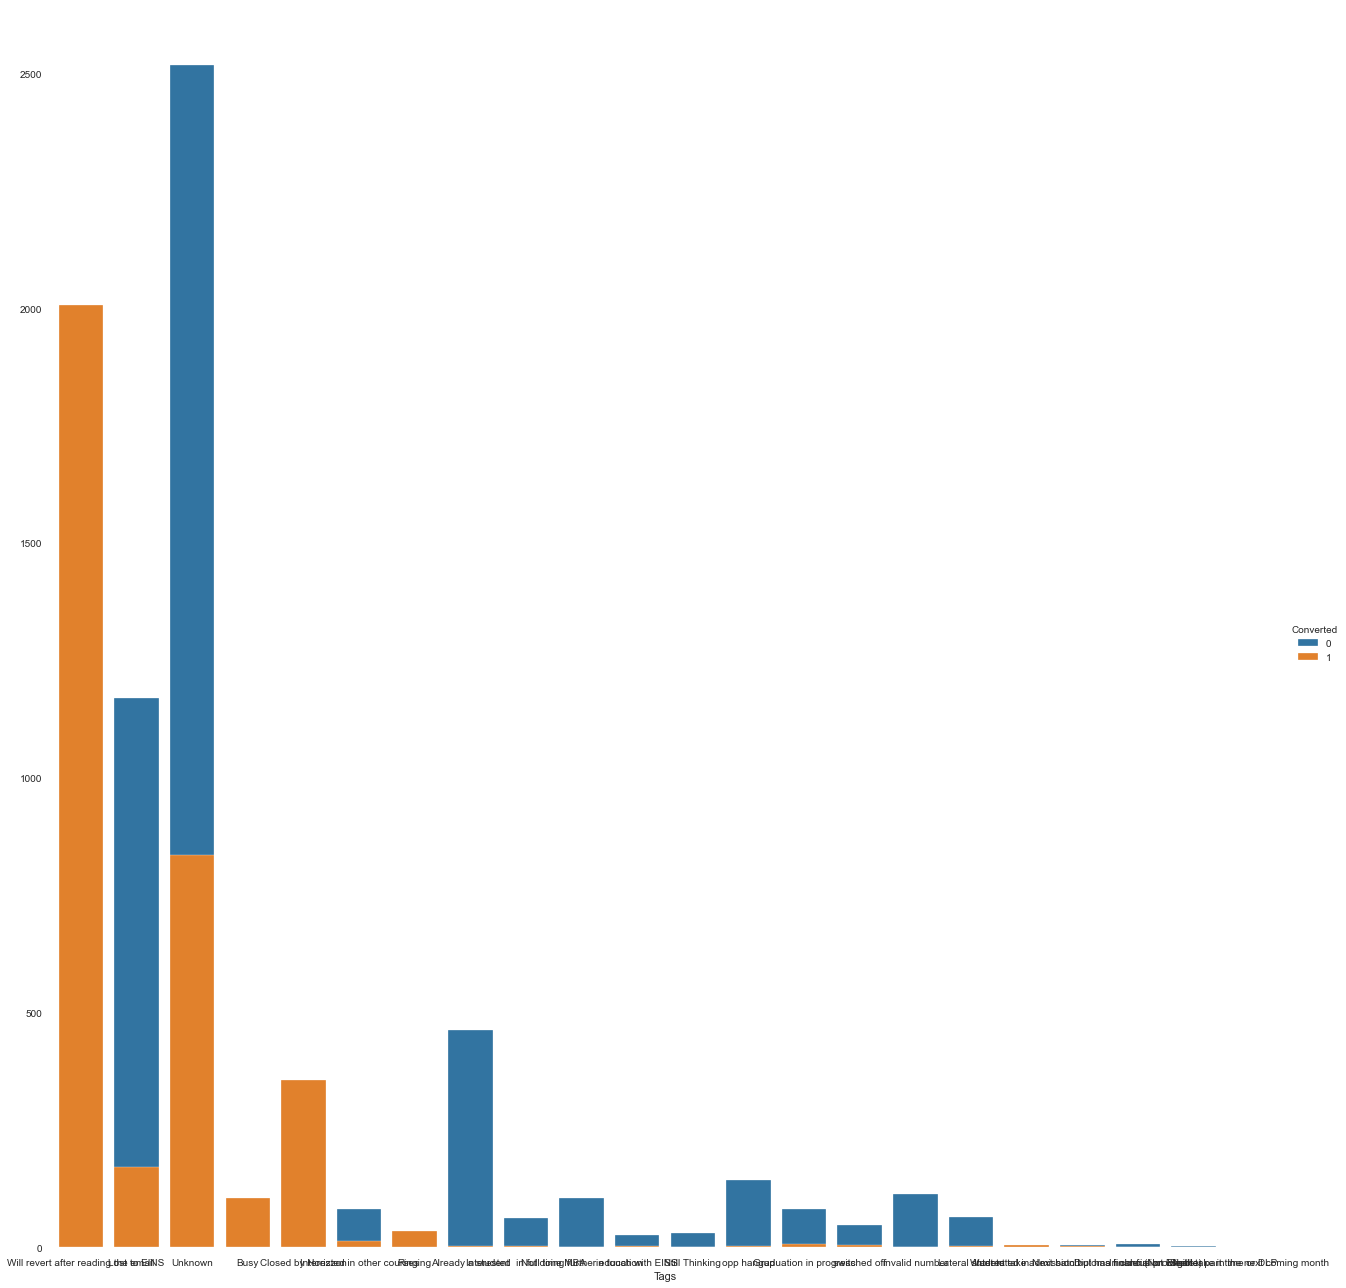

In [118]:
sns.FacetGrid(df, hue="Converted", size=18) \
   .map(sns.countplot, "Tags") \
   .add_legend();


In [119]:
df.drop(columns=['Tags'],inplace=True)

In [120]:
df.shape

(9240, 32)

In [121]:
df['Converted'].value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

<b>'Lead Quality' feature analysis and treatment to null values<b>

In [122]:
df['Lead Quality'].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [123]:
df['Lead Quality'].isnull().sum()

4767

In [124]:
df['Lead Quality'].fillna('Unkown',inplace=True)

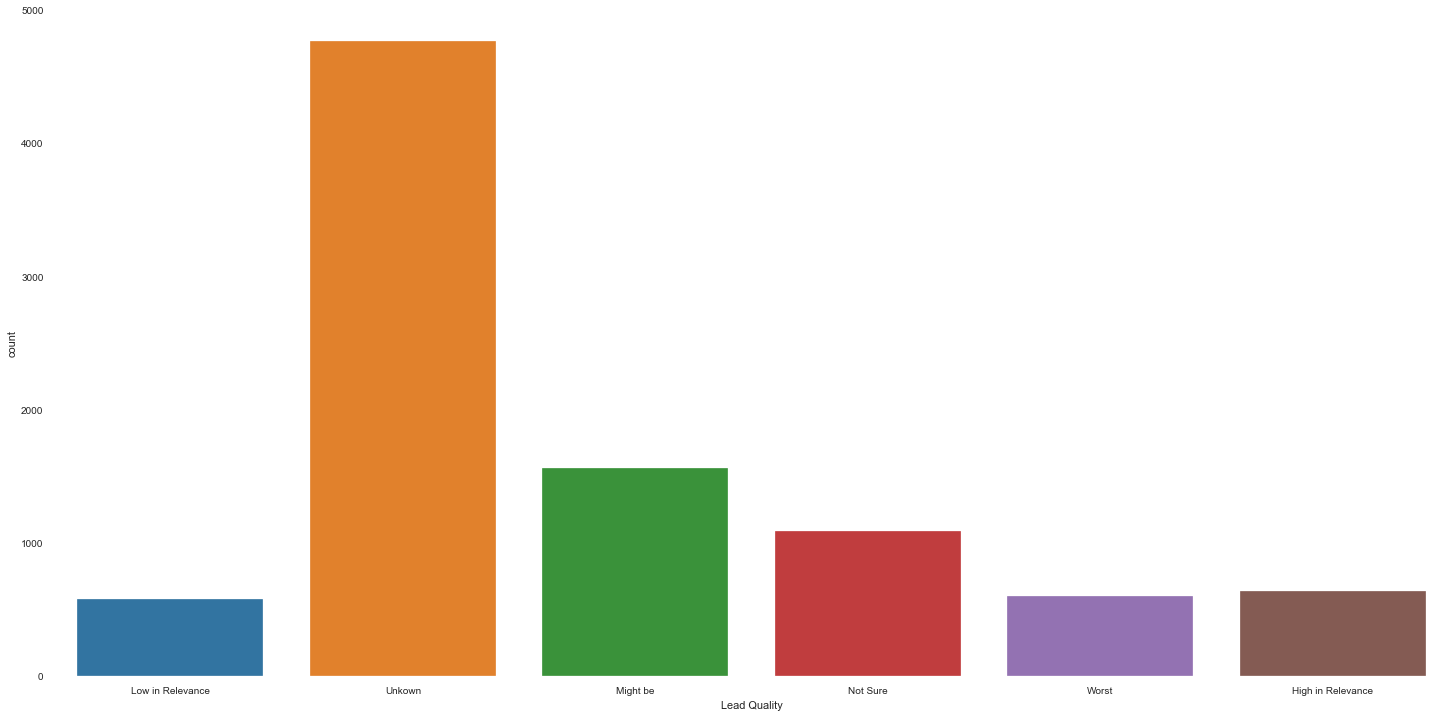

In [125]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 12.27)
sns.countplot(df['Lead Quality'])

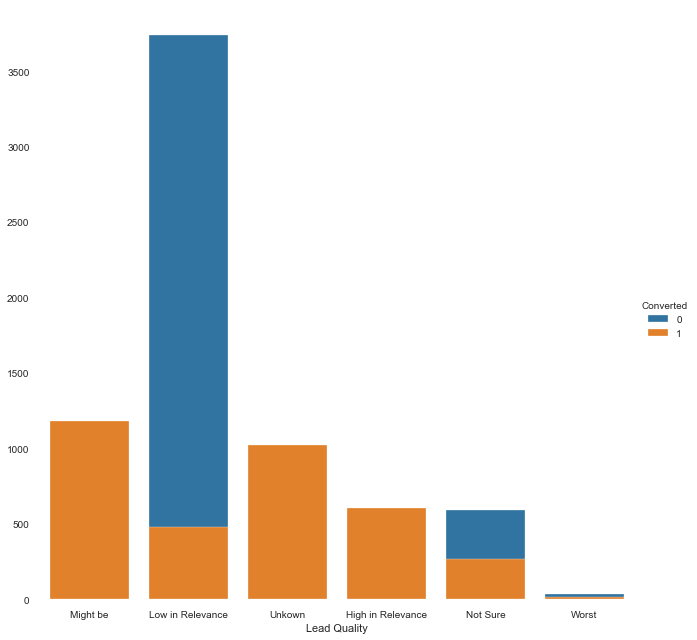

In [126]:

sns.FacetGrid(df, hue="Converted", size=9) \
   .map(sns.countplot, "Lead Quality") \
   .add_legend();


<b>'Lead Profile' feature analysis

In [127]:
df['Lead Profile'].unique()

array(['Select', 'Potential Lead', nan, 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

In [128]:
df['Lead Profile'].isnull().sum()

2709

In [129]:
df['Lead Profile'].fillna('Unknown',inplace=True)

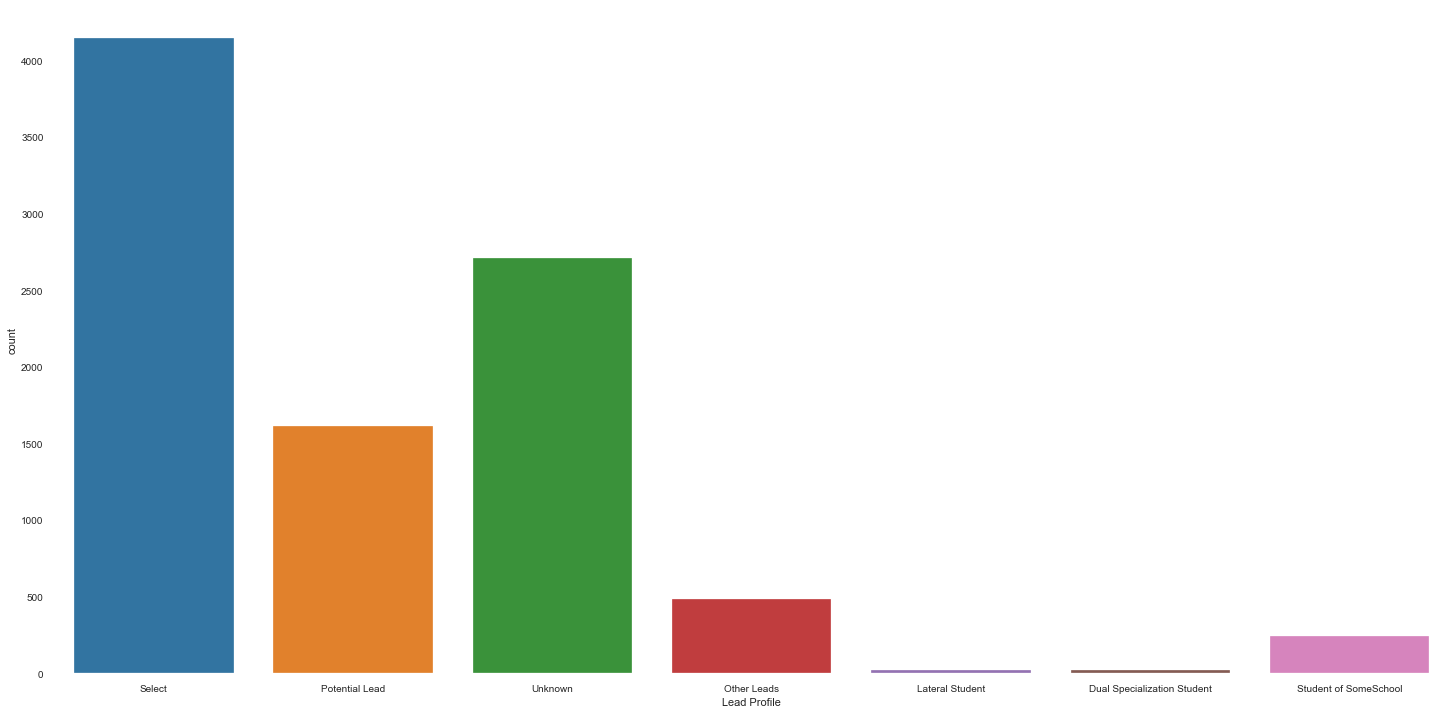

In [130]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 12.27)
sns.countplot(df['Lead Profile'])

In [131]:
#have to drop this feature because most of the values are either null or not selecting
df.drop(columns=['Lead Profile'],axis=1,inplace=True)

In [132]:
# some features are dropped seeing their relevance with the dependent variable
df.drop(columns=['Update me on Supply Chain Content','Receive More Updates About Our Courses','What matters most to you in choosing a course','Get updates on DM Content','City','I agree to pay the amount through cheque','A free copy of Mastering The Interview'],inplace=True,axis=1)

In [133]:
df.drop(columns=['Search','Magazine','Asymmetrique Activity Index','Asymmetrique Profile Index','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],inplace=True,axis=1)

In [134]:
df.drop(columns=['Country_name'],axis=1,inplace=True)

In [135]:
df.shape

(9240, 14)

<b>['Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score'] analysis

In [136]:
df.iloc[:5,12:14]

,Asymmetrique Profile Score,Last Notable Activity
0,15.0,Modified
1,15.0,Email Opened
2,20.0,Email Opened
3,17.0,Modified
4,18.0,Modified


In [137]:
for i in range(11,13):
    print((df.iloc[:,i]).name)
    print((df.iloc[:,i]).isnull().sum())

Asymmetrique Activity Score
4218
Asymmetrique Profile Score
4218


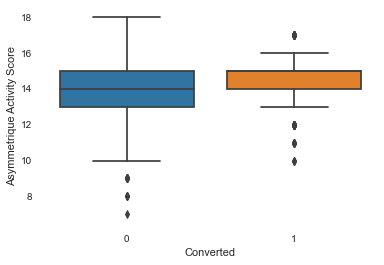

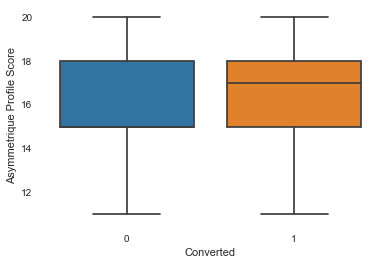

In [138]:
for i in range(11,13):
    sns.boxplot(x='Converted',y=df.iloc[:,i], data=df)
    plt.show()

In [139]:
df['Asymmetrique Activity Score'].fillna(df['Asymmetrique Activity Score'].median(),inplace=True)

In [140]:
df['Asymmetrique Profile Score'].fillna(df['Asymmetrique Profile Score'].median(),inplace=True)

In [141]:
df.shape

(9240, 14)

In [142]:
# null values in data matrix
df.isnull().sum()

Lead Origin                           0
Lead Source                          36
Do Not Email                          0
Do Not Call                           0
Converted                             0
TotalVisits                         137
Total Time Spent on Website           0
Page Views Per Visit                137
Specialization                     1438
What is your current occupation       0
Lead Quality                          0
Asymmetrique Activity Score           0
Asymmetrique Profile Score            0
Last Notable Activity                 0
dtype: int64

<b>'Specialization' feature analysis 

In [143]:
df['Specialization'].unique()

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [144]:
df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [145]:
df['Specialization'].isnull().sum()

1438

In [146]:
## drop Specialization
df.drop('Specialization',axis=1,inplace=True)

<b>Continious variable feature analysis 

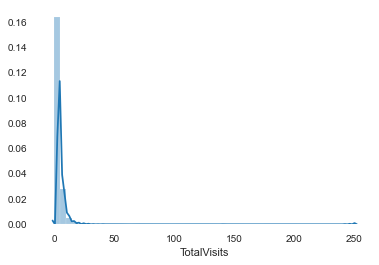

In [147]:
sns.distplot(df['TotalVisits'])
df['TotalVisits'].fillna(df['TotalVisits'].median(),inplace=True)

In [148]:
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(),inplace=True)

##### EDA of continious variables

In [149]:
contin_variab=df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]

In [150]:
contin_variab.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,0.0,0,0.0,0
1,5.0,674,2.5,0
2,2.0,1532,2.0,1
3,1.0,305,1.0,0
4,2.0,1428,1.0,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\dis

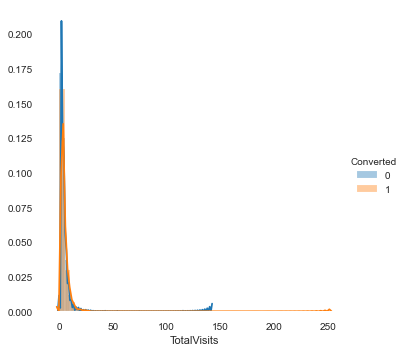

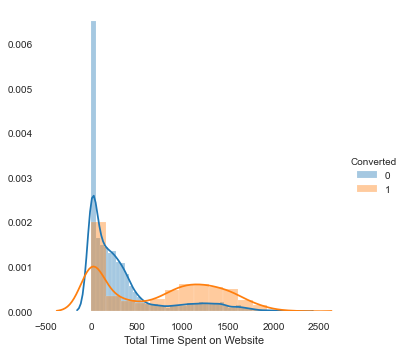

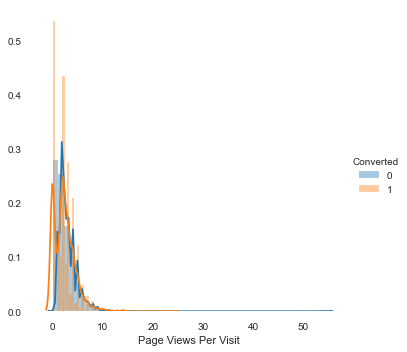

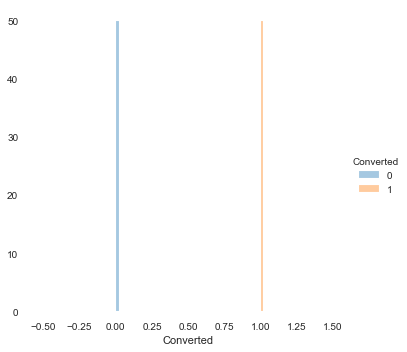

In [151]:
for i in contin_variab:
    sns.FacetGrid(contin_variab, hue="Converted", size=5) \
   .map(sns.distplot, i) \
   .add_legend();
plt.show();

In [152]:
df.isnull().sum()

Lead Origin                         0
Lead Source                        36
Do Not Email                        0
Do Not Call                         0
Converted                           0
TotalVisits                         0
Total Time Spent on Website         0
Page Views Per Visit                0
What is your current occupation     0
Lead Quality                        0
Asymmetrique Activity Score         0
Asymmetrique Profile Score          0
Last Notable Activity               0
dtype: int64

In [153]:
df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

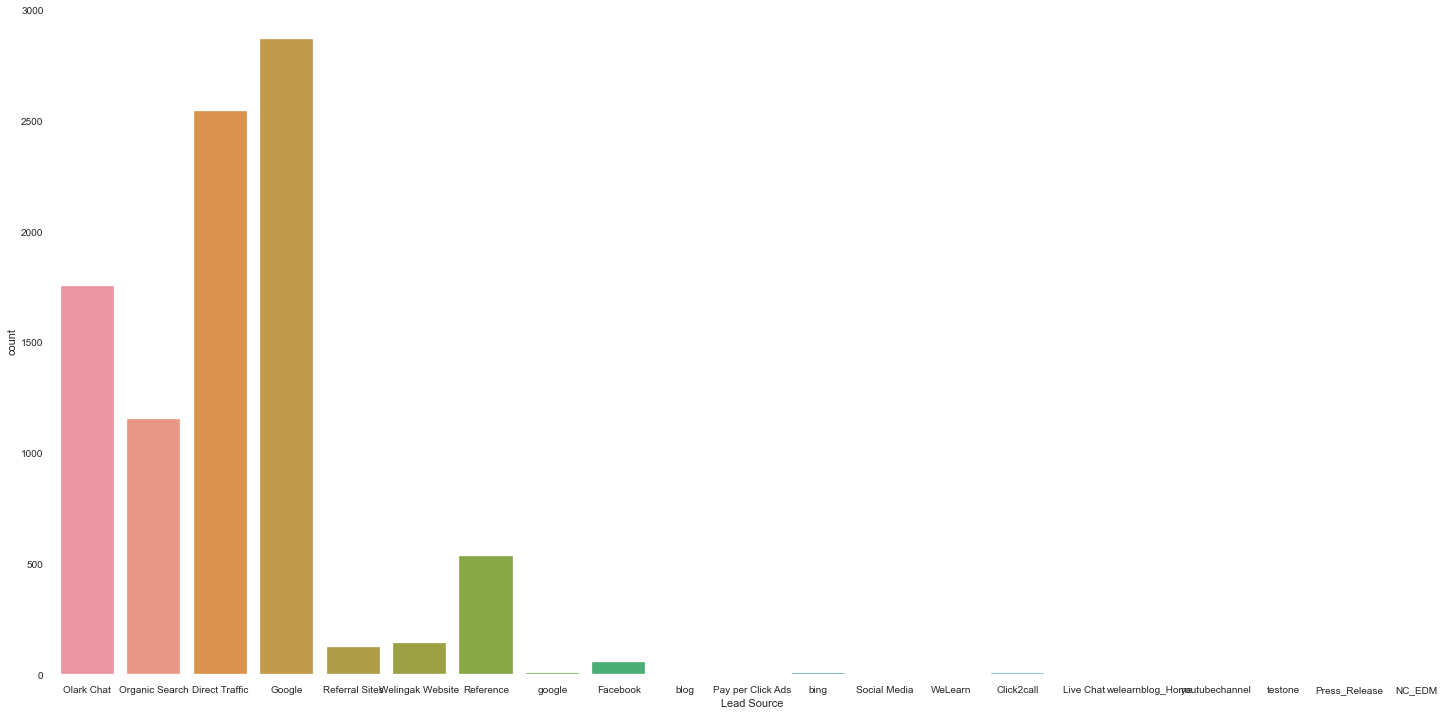

In [154]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 12.27)
sns.countplot(df['Lead Source'])

In [155]:
# handling the null_value
df['Lead Source'].fillna('Google',inplace=True)

EDA
forward feature/backward
PCA 
T-SnE
F.E. (add feature) ---knn 
model building --- logistic vs naive vs random forest vs dt 
accuracy scores (roc confusion matrix logloss)
*** interpretability feature importance!

## automate EDA

In [156]:
from pandas_profiling import ProfileReport

In [157]:
Profile=ProfileReport(df,title='Pandas Profiling Report',explorative=True)

In [158]:
Profile.to_file("Pandas_report.html")

In [162]:
encoded_df=pd.get_dummies(data=df,drop_first=True)


In [163]:
encoded_df.shape

(9240, 58)

In [164]:
encoded_df

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,15.0,15.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,15.0,15.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,14.0,20.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,13.0,17.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,15.0,18.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,15.0,17.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,14.0,19.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,13.0,20.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,15.0,16.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [165]:
y=encoded_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [172]:
x=encoded_df.iloc[:,1:]
x.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,15.0,15.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,15.0,15.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,14.0,20.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,13.0,17.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,15.0,18.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Train test Split

In [178]:
from sklearn.model_selection import train_test_split
# split the data set into train and test
X_1, X_test, y_1, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [179]:
# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)

### logitstic Regression

In [190]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=0)

In [191]:
clf.fit(X_1, y_1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [192]:
pred=clf.predict(X_cv)

In [196]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
print("Accuracy for cross validation dataset is {} using logistic regression" .format(acc))

Accuracy for cross validation dataset is 84.59556929417826 using logistic regression


Confusion matrix of cross validation dataset 


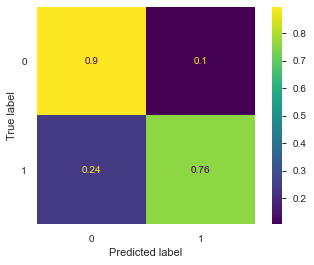

In [209]:
from sklearn.metrics import plot_confusion_matrix
mat=plot_confusion_matrix(clf,X_cv,y_cv,normalize='true')
print('Confusion matrix of cross validation dataset ')
mat

In [211]:
pred_test=clf.predict(X_test)
acc_test = accuracy_score(y_test, pred_test, normalize=True) * float(100)
print("Accuracy for cross validation dataset is {} using logistic regression" .format(acc_test))

Accuracy for cross validation dataset is 83.6940836940837 using logistic regression


Confusion matrix of test dataset 


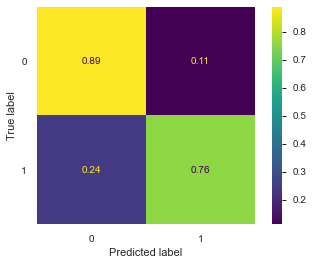

In [212]:
mat_test=plot_confusion_matrix(clf,X_test,y_test,normalize='true')
print('Confusion matrix of test dataset ')
mat

### naive bayes

In [213]:
from sklearn.naive_bayes import BernoulliNB

In [214]:
nv=BernoulliNB()
nv.fit(X_1,y_1)

BernoulliNB()

In [219]:
pred2=nv.predict(X_cv)

In [222]:
acc = accuracy_score(y_cv, pred2, normalize=True) * float(100)
print("Accuracy for cross validation dataset is {} using Naive Bayes" .format(acc))

Accuracy for cross validation dataset is 81.71045852653272 using Naive Bayes


Confusion matrix of cross validation dataset USing Naive Bayes 


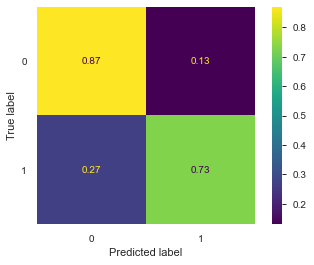

In [225]:
mat2=plot_confusion_matrix(nv,X_cv,y_cv,normalize='true')
print('Confusion matrix of cross validation dataset USing Naive Bayes ')
mat2

In [315]:
pred2_test=clf.predict(X_test)
acc2_test = accuracy_score(y_test, pred2_test, normalize=True) * float(100)
print("Accuracy for test dataset is {} using Naive Bayes" .format(acc2_test))

Accuracy for test dataset is 83.6940836940837 using Naive Bayes


Confusion matrix of test dataset USing Naive Bayes 


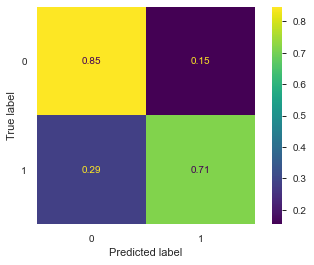

In [316]:
mat2_test=plot_confusion_matrix(nv,X_test,y_test,normalize='true')
print('Confusion matrix of test dataset USing Naive Bayes ')
mat2_test

### Random Forest

In [233]:
from sklearn.ensemble import RandomForestClassifier

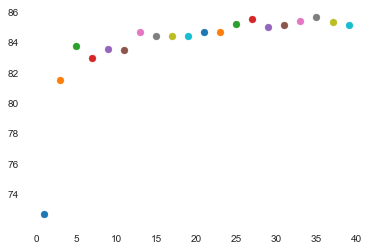

In [289]:
for i in range(1,40,2):
    rfclf1=RandomForestClassifier(n_estimators=i,random_state=0,max_depth=5)
    rfclf1.fit(X_1,y_1)
    pred5=rfclf1.predict(X_cv)
    acc = accuracy_score(y_cv, pred5, normalize=True) * float(100)
    plt.scatter(i,acc)

#### thus we decide n_estimators=6

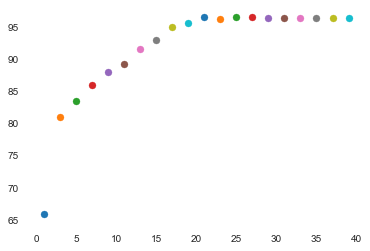

In [290]:
for i in range(1,40,2):
    rfclf1=RandomForestClassifier(n_estimators=6,random_state=0,max_depth=i)
    rfclf1.fit(X_1,y_1)
    pred5=rfclf1.predict(X_cv)
    acc = accuracy_score(y_cv, pred5, normalize=True) * float(100)
    plt.scatter(i,acc)

#### thus we decide max_depth=10

In [292]:
rfclf=RandomForestClassifier(n_estimators=6,random_state=0,max_depth=10)
rfclf.fit(X_1,y_1)

RandomForestClassifier(max_depth=10, n_estimators=6, random_state=0)

In [294]:
pred_rf=rfclf.predict(X_test)

In [317]:
acc_rf_test = accuracy_score(y_test, pred_rf, normalize=True) * float(100)
print("Accuracy for test dataset is {} using Random Forest" .format(acc_rf_test))

Accuracy for test dataset is 85.71428571428571 using Random Forest


Confusion matrix of test dataset USing Random Forest 


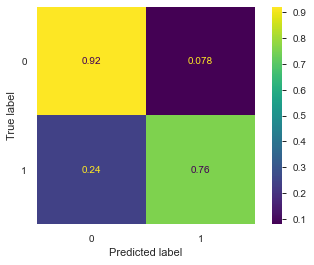

In [318]:
mat_rf_test=plot_confusion_matrix(rfclf,X_test,y_test,normalize='true')
print('Confusion matrix of test dataset USing Random Forest ')
mat_rf_test

<b> We can use Logistic Regression or Random Forest as our main focus is to Predict correct class label and both algorithms are performing more or less the same so it's better to use logistic regression because of computational and interpretability constraints

Confusion matrix of test dataset Using Logistic Regression 


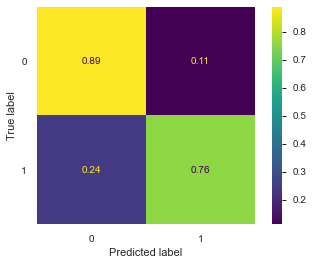

In [298]:
mat_test=plot_confusion_matrix(clf,X_test,y_test,normalize='true')
print('Confusion matrix of test dataset Using Logistic Regression ')
mat

In [348]:
proba=clf.predict_proba(x)

In [350]:
final_proba=proba[:,1]*100
len(final_proba)

9240

In [351]:
df['Prob_Score']=final_proba

In [352]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Lead Quality,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity,Prob_Score
0,API,Olark Chat,No,No,0,0.0,0,0.0,Unemployed,Low in Relevance,15.0,15.0,Modified,46.456922
1,API,Organic Search,No,No,0,5.0,674,2.5,Unemployed,Unkown,15.0,15.0,Email Opened,41.356009
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Student,Might be,14.0,20.0,Email Opened,91.466182
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unemployed,Not Sure,13.0,17.0,Modified,2.954244
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Unemployed,Might be,15.0,18.0,Modified,80.553827


In [353]:
df.shape

(9240, 14)

In [354]:
df.to_csv('soln_score.csv')